

## Gait Recognition ML Project


# Step 1: Load, Combine, and Inspect All Sensor Data

What I did:

Loaded all 10 CSV files (one per subject) using pandas.

Combined them into one big DataFrame so I could work with all the data at once.

Checked the overall shape, displayed the first few rows, and counted how many samples there are for each activity label.

In [1]:
import pandas as pd

# Load all files with headers
df1 = pd.read_csv('data/mHealth_subject1.csv')  
df2 = pd.read_csv('data/mHealth_subject2.csv')
df3 = pd.read_csv('data/mHealth_subject3.csv')
df4 = pd.read_csv('data/mHealth_subject4.csv')
df5 = pd.read_csv('data/mHealth_subject5.csv')
df6 = pd.read_csv('data/mHealth_subject6.csv')
df7 = pd.read_csv('data/mHealth_subject7.csv')
df8 = pd.read_csv('data/mHealth_subject8.csv')
df9 = pd.read_csv('data/mHealth_subject9.csv')
df10 = pd.read_csv('data/mHealth_subject10.csv')

# Combine all into one DataFrame
all_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

# Explore the combined data
print("Shape:", all_data.shape)
display(all_data.head())

print("\nActivity label counts:")
display(all_data['Label'].value_counts())


Shape: (1215755, 24)


,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0.0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0.0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0.0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0.0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0.0



Activity label counts:


Label
0.0     872550
1.0      30720
2.0      30720
3.0      30720
4.0      30720
9.0      30720
5.0      30720
11.0     30720
10.0     30720
7.0      29441
8.0      29337
6.0      28315
12.0     10342
Name: count, dtype: int64

# Step 2: Remove Null Activities, Inspect Stats, and Map Activity Names

What I did:

Remove rows where the activity label is 0 (the null class).

Print basic statistics (describe()) to look for outliers, missing values, or weird ranges.

Map activity numbers to human-readable names for easier analysis later.

In [2]:


# 1. Remove rows where Label == 0 (null activity)
data_for_model = all_data[all_data['Label'] != 0].reset_index(drop=True)

# 2. Print basic statistics
display(data_for_model.describe())

# 3. Map activity numbers to names
activity_map = {
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'
}

data_for_model['ActivityName'] = data_for_model['Label'].map(activity_map)
display(data_for_model[['Label', 'ActivityName']].head(10))


,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label
count,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,...,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000
mean,-7.485271,-0.140923,-0.938418,0.003649,-0.008048,1.805184,-9.061487,-0.701985,0.101167,-0.549942,...,-3.448201,-5.781446,2.381165,-0.201574,-0.410515,0.380693,-0.532629,1.422140,0.030670,6.169021
std,5.701949,2.799380,4.611164,0.839074,0.857724,4.214175,5.200389,6.457622,0.458913,0.434721,...,5.891595,6.578371,4.177971,0.549524,0.546359,0.515658,34.216257,30.285262,82.663004,3.298902
min,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-1.779200,-2.660400,...,-22.345000,-18.972000,-18.238000,-1.170600,-2.256700,-1.114200,-319.030000,-358.130000,-702.570000,1.000000
25%,-9.707100,-1.294300,-3.686550,-0.213500,-0.171640,0.159875,-10.063000,-3.494350,-0.345080,-0.810510,...,-5.013900,-9.558100,0.139070,-0.682350,-0.831620,-0.040948,-6.228350,-7.272000,-12.170000,3.000000
50%,-8.800300,-0.292570,-0.881070,-0.071167,-0.046049,1.372500,-9.597700,0.340070,0.204080,-0.688560,...,-2.480000,-7.738900,1.819100,-0.300000,-0.597540,0.448280,0.360740,0.353930,-0.709300,6.000000
75%,-5.117400,0.984775,1.092650,0.163270,0.138150,2.924450,-7.549800,1.819300,0.487940,-0.487800,...,-0.539050,-2.359550,5.324750,0.278430,-0.045175,0.840520,5.224000,8.350250,10.302500,9.000000
max,19.094000,20.927000,26.196000,8.506500,8.519100,20.024000,21.161000,25.015000,1.710600,1.752300,...,19.801000,21.965000,25.741000,1.415700,1.121100,1.528000,239.690000,335.250000,657.180000,12.000000


,Label,ActivityName
0,1.0,Standing still
1,1.0,Standing still
2,1.0,Standing still
3,1.0,Standing still
4,1.0,Standing still
5,1.0,Standing still
6,1.0,Standing still
7,1.0,Standing still
8,1.0,Standing still
9,1.0,Standing still


# Step 3: Split the Data into Features (X) and Target Labels (y)

In this step, I separated my data into two parts:

X: all the sensor readings (features)

y: the activity label that I want the model to predict

In [3]:
# I dropped the label and activity name columns to get only the features
X = data_for_model.drop(['Label', 'ActivityName'], axis=1)

# I set y to the label column (the target I want to predict)
y = data_for_model['Label']

# I also saved the activity names in case I want to use them later for plots
y_names = data_for_model['ActivityName']

# I checked the shapes and a preview
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)
display(X.head())
display(y.value_counts())


Shape of X (features): (343205, 23)
Shape of y (labels): (343205,)


,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),...,magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis)
0,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-0.73822,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,...,-0.88628,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363
2,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,...,-1.01980,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
3,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,...,-1.17150,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198
4,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,...,-0.88628,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017


Label
1.0     30720
2.0     30720
3.0     30720
4.0     30720
9.0     30720
5.0     30720
11.0    30720
10.0    30720
7.0     29441
8.0     29337
6.0     28315
12.0    10342
Name: count, dtype: int64

# Step 4: Window the Data for Features and Target

What I did:
Use 100 samples per window (so 2 seconds at 50Hz).

Use 50% overlap (means every new window starts 50 samples after the previous).

For features: extract stats from each window.

For target label: usually use the most frequent (mode) label in the window (not max, since the label could be non-numeric—mode is standard for activity recognition)

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import mode

window_size = 100   # 2 seconds at 50Hz
step_size = 50      # 50% overlap

features_list = []
labels_list = []

# Loop through data in windows
for start in range(0, len(X) - window_size + 1, step_size):
    end = start + window_size
    X_win = X.iloc[start:end]
    y_win = y.iloc[start:end]

    # Calculate features for each column in this window
    feature_row = []
    for col in X_win.columns:
        arr = X_win[col].values
        feature_row.extend([
            arr.mean(),
            arr.std(),
            arr.min(),
            arr.max(),
            np.sqrt(np.mean(arr**2)),  # RMS
        ])
    features_list.append(feature_row)

    # Assign mode label as target for this window
    win_label = mode(y_win,keepdims=True).mode[0]
    labels_list.append(win_label)

# Build DataFrame for windowed features
feature_names = []
for col in X.columns:
    feature_names.extend([
        f"{col}_mean",
        f"{col}_std",
        f"{col}_min",
        f"{col}_max",
        f"{col}_rms"
    ])

X_feat = pd.DataFrame(features_list, columns=feature_names)
y_feat = np.array(labels_list)


In [5]:

# Check the shape of the new feature table and labels
print("X_feat shape:", X_feat.shape)
print("y_feat shape:", y_feat.shape)

# Display the first few rows of your engineered feature set
display(X_feat.head())

# Display the distribution of windowed labels
unique, counts = np.unique(y_feat, return_counts=True)
label_dist = pd.DataFrame({'Label': unique, 'Count': counts})
display(label_dist)


X_feat shape: (6863, 115)
y_feat shape: (6863,)


,acceleration from the chest sensor (X axis)_mean,acceleration from the chest sensor (X axis)_std,acceleration from the chest sensor (X axis)_min,acceleration from the chest sensor (X axis)_max,acceleration from the chest sensor (X axis)_rms,acceleration from the chest sensor (Y axis)_mean,acceleration from the chest sensor (Y axis)_std,acceleration from the chest sensor (Y axis)_min,acceleration from the chest sensor (Y axis)_max,acceleration from the chest sensor (Y axis)_rms,...,magnetometer from the right-lower-arm sensor (Y axis)_mean,magnetometer from the right-lower-arm sensor (Y axis)_std,magnetometer from the right-lower-arm sensor (Y axis)_min,magnetometer from the right-lower-arm sensor (Y axis)_max,magnetometer from the right-lower-arm sensor (Y axis)_rms,magnetometer from the right-lower-arm sensor (Z axis)_mean,magnetometer from the right-lower-arm sensor (Z axis)_std,magnetometer from the right-lower-arm sensor (Z axis)_min,magnetometer from the right-lower-arm sensor (Z axis)_max,magnetometer from the right-lower-arm sensor (Z axis)_rms
0,-9.722690,0.137820,-10.0390,-9.1065,9.723667,0.200457,0.140867,-0.085462,0.69219,0.245003,...,0.313177,0.613644,-1.46410,1.8039,0.688940,-0.443540,0.595732,-2.5340,1.1009,0.742715
1,-9.726223,0.157531,-10.1170,-9.1065,9.727499,0.205468,0.130565,-0.024468,0.69219,0.243443,...,0.561583,0.507369,-0.36651,2.1578,0.756835,-0.397716,0.548927,-2.1765,1.0956,0.677863
2,-9.761108,0.139119,-10.1170,-9.3725,9.762099,0.232504,0.140163,-0.165120,0.58919,0.271484,...,0.349281,0.551759,-0.91439,2.1578,0.653020,-0.333022,0.555918,-1.4475,1.4493,0.648035
3,-9.751908,0.124986,-10.0120,-9.3982,9.752709,0.221647,0.149690,-0.165120,0.58919,0.267459,...,0.456264,1.377002,-2.72700,5.7852,1.450624,-0.429675,0.768944,-3.2952,1.4908,0.880849
4,-9.729408,0.126896,-9.9964,-9.3312,9.730235,0.202862,0.145882,-0.114710,0.60054,0.249869,...,0.615053,1.357140,-2.72700,5.7852,1.490006,-0.687260,0.794598,-3.2952,1.4908,1.050577


,Label,Count
0,1.0,613
1,2.0,615
2,3.0,615
3,4.0,613
4,5.0,614
5,6.0,569
6,7.0,588
7,8.0,588
8,9.0,612
9,10.0,616


# Step 5: Normalize Data and Run Cross-Validation to Evaluate Model Performance

What I did:

Applied StandardScaler to normalize all features before model training.

Used 5-fold cross-validation to evaluate how well Random Forest and XGBoost perform on the normalized windowed feature set.

Calculated average accuracy and macro F1-score to see how models generalize to new, unseen data before picking features.

In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

#scaling
scaler = StandardScaler()
X_feat_scaled = scaler.fit_transform(X_feat)
X_feat = pd.DataFrame(X_feat_scaled, columns=X_feat.columns)

# 5-fold stratified cross-validation setup



# Define the models (but don't train them yet - CV will do that)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf_cv_acc = cross_val_score(rf, X_feat, y_feat, cv=cv, scoring='accuracy')
rf_cv_f1 = cross_val_score(rf, X_feat, y_feat, cv=cv, scoring=make_scorer(f1_score, average='macro'))
print(f"Random Forest CV Accuracy: {rf_cv_acc.mean():.3f} ± {rf_cv_acc.std():.3f}")
print(f"Random Forest CV Macro F1: {rf_cv_f1.mean():.3f} ± {rf_cv_f1.std():.3f}")

# XGBoost (labels must start at 0 for XGBoost)
y_feat_xgb = y_feat - 1
xgb_cv_acc = cross_val_score(xgb, X_feat, y_feat_xgb, cv=cv, scoring='accuracy')
xgb_cv_f1 = cross_val_score(xgb, X_feat, y_feat_xgb, cv=cv, scoring=make_scorer(f1_score, average='macro'))
print(f"XGBoost CV Accuracy: {xgb_cv_acc.mean():.3f} ± {xgb_cv_acc.std():.3f}")
print(f"XGBoost CV Macro F1: {xgb_cv_f1.mean():.3f} ± {xgb_cv_f1.std():.3f}")


Random Forest CV Accuracy: 0.991 ± 0.003
Random Forest CV Macro F1: 0.990 ± 0.003
XGBoost CV Accuracy: 0.991 ± 0.002
XGBoost CV Macro F1: 0.991 ± 0.002


# Step 6: Split the Windowed Feature Data into Training and Test Sets

What I did:
I took my new feature table (with all the statistics from each window) and split it into two parts: a training set (to train the model) and a test set (to see how well the model works on new, unseen data). I made sure the activity labels were balanced in both sets by using stratified splitting.

In [7]:
from sklearn.model_selection import train_test_split

# I split the features and labels into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y_feat, test_size=0.3, random_state=42, stratify=y_feat)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (4804, 115)
Test set shape: (2059, 115)


# Step 7: Train a Random Forest Classifier on the Windowed Features

What I did:

Trained a Random Forest classifier using my training data (X_train, y_train)

Predicted the activity labels for the test data (X_test)

Evaluated the predictions using a classification report and confusion matrix to see how well the model performed

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time
# Train the Random Forest model
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_full_time = time.time() - start_time
print(f"Random Forest (full features) training time: {rf_full_time:.2f} seconds")

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)))

print("Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))


Random Forest (full features) training time: 4.44 seconds
Classification Report:


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,accuracy,macro avg,weighted avg
precision,0.994505,0.994595,1.0,0.989189,0.963351,0.994048,0.994220,0.977401,0.994565,1.0,0.994595,1.000000,0.990772,0.991372,0.990893
recall,0.983696,0.994595,1.0,0.994565,1.000000,0.976608,0.977273,0.982955,0.994565,1.0,1.000000,0.967742,0.990772,0.989333,0.990772
f1-score,0.989071,0.994595,1.0,0.991870,0.981333,0.985251,0.985673,0.980170,0.994565,1.0,0.997290,0.983607,0.990772,0.990285,0.990777
support,184.000000,185.000000,184.0,184.000000,184.000000,171.000000,176.000000,176.000000,184.000000,185.0,184.000000,62.000000,0.990772,2059.000000,2059.000000


Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9,10,11
0,181,1,0,0,2,0,0,0,0,0,0,0
1,1,184,0,0,0,0,0,0,0,0,0,0
2,0,0,184,0,0,0,0,0,0,0,0,0
3,0,0,0,183,1,0,0,0,0,0,0,0
4,0,0,0,0,184,0,0,0,0,0,0,0
5,0,0,0,2,1,167,1,0,0,0,0,0
6,0,0,0,0,0,0,172,4,0,0,0,0
7,0,0,0,0,1,1,0,173,1,0,0,0
8,0,0,0,0,1,0,0,0,183,0,0,0
9,0,0,0,0,0,0,0,0,0,185,0,0


# Step 8: Train and Evaluate an XGBoost Classifier

What I did:

* Fixed the label indexing issue (XGBoost needs labels 0-11, but our data has 1-12)
* Trained an XGBoost classifier on the training features with corrected labels
* Predicted activity labels for the test set
* Converted results back to original activity labels (1-12) for evaluation
* Evaluated the results using a classification report and confusion matrix

In [9]:
from xgboost import XGBClassifier
import time

# subtract 1 from labels
y_train_XG = y_train - 1  # Converts 1,2,3...12 to 0,1,2...11
y_test_XG = y_test - 1

# Train XGBoost 

start_time = time.time()
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train_XG)
xgb_full_time = time.time() - start_time
print(f"XGBoost (full features) training time: {xgb_full_time:.2f} seconds")

# Predict
y_pred_xgb = xgb.predict(X_test)

# For evaluation, add 1 back to get original labels
y_pred_original = y_pred_xgb + 1
y_test_original = y_test_XG + 1

# Evaluate with original label format
print("XGBoost Classification Report:")
display(pd.DataFrame(classification_report(y_test_original, y_pred_original, output_dict=True)))

print("XGBoost Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test_original, y_pred_original)))

XGBoost (full features) training time: 2.63 seconds
XGBoost Classification Report:


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,accuracy,macro avg,weighted avg
precision,0.994505,0.994595,1.0,0.994565,0.963351,0.988235,0.994220,0.977528,1.0,0.989305,1.000000,1.000000,0.990772,0.991359,0.990910
recall,0.983696,0.994595,1.0,0.994565,1.000000,0.982456,0.977273,0.988636,1.0,1.000000,0.989130,0.951613,0.990772,0.988497,0.990772
f1-score,0.989071,0.994595,1.0,0.994565,0.981333,0.985337,0.985673,0.983051,1.0,0.994624,0.994536,0.975207,0.990772,0.989833,0.990775
support,184.000000,185.000000,184.0,184.000000,184.000000,171.000000,176.000000,176.000000,184.0,185.000000,184.000000,62.000000,0.990772,2059.000000,2059.000000


XGBoost Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9,10,11
0,181,1,0,0,2,0,0,0,0,0,0,0
1,1,184,0,0,0,0,0,0,0,0,0,0
2,0,0,184,0,0,0,0,0,0,0,0,0
3,0,0,0,183,0,1,0,0,0,0,0,0
4,0,0,0,0,184,0,0,0,0,0,0,0
5,0,0,0,1,1,168,1,0,0,0,0,0
6,0,0,0,0,0,0,172,4,0,0,0,0
7,0,0,0,0,1,1,0,174,0,0,0,0
8,0,0,0,0,0,0,0,0,184,0,0,0
9,0,0,0,0,0,0,0,0,0,185,0,0


# Step 9: Feature Selection with Random Forest and XGBoost

What I did:

Trained Random Forest and XGBoost on the windowed features.

Extracted the top 20 most important features from each model.

Plotted the feature importances for both models using Seaborn.

C:\Users\jaini\AppData\Local\Temp\ipykernel_13476\1386565894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances, y='Feature', x='Importance', palette='crest')


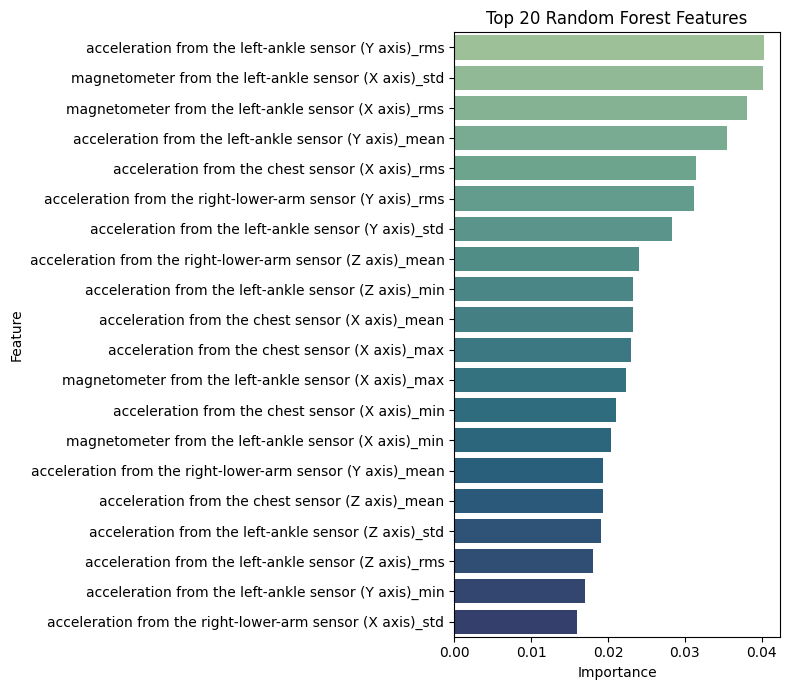

C:\Users\jaini\AppData\Local\Temp\ipykernel_13476\1386565894.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importances, y='Feature', x='Importance', palette='flare')


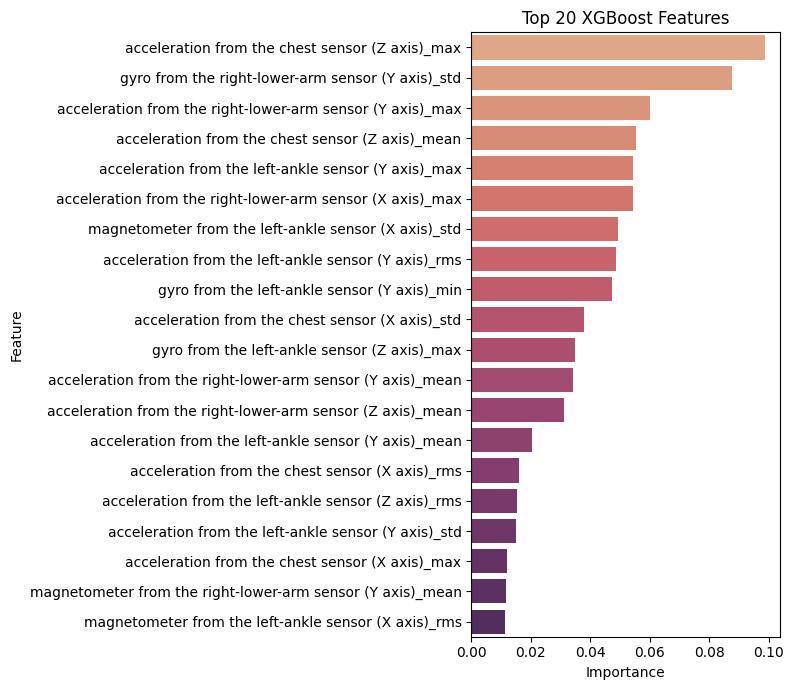

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Random Forest Feature Importances
rf_importances = pd.DataFrame({
    'Feature': X_feat.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(8, 7))
sns.barplot(data=rf_importances, y='Feature', x='Importance', palette='crest')
plt.title('Top 20 Random Forest Features')
plt.tight_layout()
plt.show()

# 2. XGBoost Feature Importances
xgb_importances = pd.DataFrame({
    'Feature': X_feat.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(8, 7))
sns.barplot(data=xgb_importances, y='Feature', x='Importance', palette='flare')
plt.title('Top 20 XGBoost Features')
plt.tight_layout()
plt.show()


# Step 10: Find Shared and Combined Top Features

What I did:

Collected the top 20 features from each model.

Found which features are common to both.

Combined all unique features for the next modeling step.

In [11]:
# Top 20 features as sets
rf_top20 = set(rf_importances['Feature'])
xgb_top20 = set(xgb_importances['Feature'])

# Features that appear in both
shared_features = rf_top20 & xgb_top20
print("Common features:", shared_features)

# All unique top features from both
combined_features = list(rf_top20 | xgb_top20)
print("Total unique top features:", len(combined_features))


Common features: {'acceleration from the right-lower-arm sensor (Z axis)_mean', 'magnetometer from the left-ankle sensor (X axis)_rms', 'acceleration from the left-ankle sensor (Y axis)_mean', 'acceleration from the left-ankle sensor (Z axis)_rms', 'acceleration from the chest sensor (X axis)_max', 'acceleration from the left-ankle sensor (Y axis)_std', 'acceleration from the chest sensor (X axis)_rms', 'acceleration from the chest sensor (Z axis)_mean', 'acceleration from the right-lower-arm sensor (Y axis)_mean', 'acceleration from the left-ankle sensor (Y axis)_rms', 'magnetometer from the left-ankle sensor (X axis)_std'}
Total unique top features: 29



# Step 11: Selected Features Model Evaluation

What I did:

• Retrained both Random Forest and XGBoost using only the 29 selected features


• Evaluated model performance using classification reports and confusion matrices



In [12]:
import time
from sklearn.metrics import classification_report, confusion_matrix

# Select features from the ALREADY SPLIT data
X_train_sel = X_train[combined_features]  # Use existing train split
X_test_sel = X_test[combined_features]    # Use existing test split

# Same labels
y_train_sel = y_train
y_test_sel = y_test


# Time Random Forest
start_rf = time.time()
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_sel, y_train_sel)
y_pred_rf_sel = rf_selected.predict(X_test_sel)
rf_time = time.time() - start_rf

print(f"Random Forest (selected features) training time: {rf_time:.2f} seconds")
print("Classification Report (RF):")
display(pd.DataFrame(classification_report(y_test_sel, y_pred_rf_sel, output_dict=True)))

print("Confusion Matrix (RF):")
display(pd.DataFrame(confusion_matrix(y_test_sel, y_pred_rf_sel)))

# Time XGBoost
start_xgb = time.time()
xgb_selected = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
y_train_sel_xgb = y_train_sel - 1  # labels for XGBoost
y_test_sel_xgb = y_test_sel - 1
xgb_selected.fit(X_train_sel, y_train_sel_xgb)
y_pred_xgb_sel = xgb_selected.predict(X_test_sel) + 1  # add back 1 for comparison
xgb_time = time.time() - start_xgb

print(f"XGBoost (selected features) training time: {xgb_time:.2f} seconds")
print("Classification Report (XGBoost):")
display(pd.DataFrame(classification_report(y_test_sel, y_pred_xgb_sel, output_dict=True)))

print("Confusion Matrix (XGBoost):")
display(pd.DataFrame(confusion_matrix(y_test_sel, y_pred_xgb_sel)))

Random Forest (selected features) training time: 2.54 seconds
Classification Report (RF):


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,accuracy,macro avg,weighted avg
precision,0.994475,0.989189,0.994595,0.989189,0.968421,0.994083,0.994220,0.982955,0.989189,0.994565,0.989189,1.000000,0.989315,0.990006,0.989401
recall,0.978261,0.989189,1.000000,0.994565,1.000000,0.982456,0.977273,0.982955,0.994565,0.989189,0.994565,0.983871,0.989315,0.988907,0.989315
f1-score,0.986301,0.989189,0.997290,0.991870,0.983957,0.988235,0.985673,0.982955,0.991870,0.991870,0.991870,0.991870,0.989315,0.989413,0.989315
support,184.000000,185.000000,184.000000,184.000000,184.000000,171.000000,176.000000,176.000000,184.000000,185.000000,184.000000,62.000000,0.989315,2059.000000,2059.000000


Confusion Matrix (RF):


,0,1,2,3,4,5,6,7,8,9,10,11
0,180,2,0,0,2,0,0,0,0,0,0,0
1,1,183,1,0,0,0,0,0,0,0,0,0
2,0,0,184,0,0,0,0,0,0,0,0,0
3,0,0,0,183,1,0,0,0,0,0,0,0
4,0,0,0,0,184,0,0,0,0,0,0,0
5,0,0,0,1,1,168,1,0,0,0,0,0
6,0,0,0,0,0,0,172,3,1,0,0,0
7,0,0,0,1,0,1,0,173,1,0,0,0
8,0,0,0,0,1,0,0,0,183,0,0,0
9,0,0,0,0,0,0,0,0,0,183,2,0


XGBoost (selected features) training time: 1.11 seconds
Classification Report (XGBoost):


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,accuracy,macro avg,weighted avg
precision,1.000000,0.989247,0.994595,0.994565,0.968421,0.982456,0.994220,0.982955,0.994595,0.984043,1.000000,1.000000,0.989801,0.990425,0.989918
recall,0.983696,0.994595,1.000000,0.994565,1.000000,0.982456,0.977273,0.982955,1.000000,1.000000,0.983696,0.951613,0.989801,0.987571,0.989801
f1-score,0.991781,0.991914,0.997290,0.994565,0.983957,0.982456,0.985673,0.982955,0.997290,0.991957,0.991781,0.975207,0.989801,0.988902,0.989793
support,184.000000,185.000000,184.000000,184.000000,184.000000,171.000000,176.000000,176.000000,184.000000,185.000000,184.000000,62.000000,0.989801,2059.000000,2059.000000


Confusion Matrix (XGBoost):


,0,1,2,3,4,5,6,7,8,9,10,11
0,181,1,0,0,2,0,0,0,0,0,0,0
1,0,184,1,0,0,0,0,0,0,0,0,0
2,0,0,184,0,0,0,0,0,0,0,0,0
3,0,0,0,183,0,1,0,0,0,0,0,0
4,0,0,0,0,184,0,0,0,0,0,0,0
5,0,0,0,1,1,168,1,0,0,0,0,0
6,0,1,0,0,0,0,172,3,0,0,0,0
7,0,0,0,0,0,2,0,173,1,0,0,0
8,0,0,0,0,0,0,0,0,184,0,0,0
9,0,0,0,0,0,0,0,0,0,185,0,0


# Step 12: Create Comprehensive Results Summary Table



In [13]:


from sklearn.metrics import accuracy_score, f1_score

# Extract accuracy and F1 scores from your models
# Full features models
rf_full_acc = accuracy_score(y_test, y_pred)
rf_full_f1 = f1_score(y_test, y_pred, average='macro')

xgb_full_acc = accuracy_score(y_test_original, y_pred_original)
xgb_full_f1 = f1_score(y_test_original, y_pred_original, average='macro')

# Selected features models
rf_sel_acc = accuracy_score(y_test_sel, y_pred_rf_sel)
rf_sel_f1 = f1_score(y_test_sel, y_pred_rf_sel, average='macro')

xgb_sel_acc = accuracy_score(y_test_sel, y_pred_xgb_sel)
xgb_sel_f1 = f1_score(y_test_sel, y_pred_xgb_sel, average='macro')

# Calculate speed improvements
rf_speed_improvement = ((rf_full_time - rf_time) / rf_full_time) * 100
xgb_speed_improvement = ((xgb_full_time - xgb_time) / xgb_full_time) * 100

# Create comprehensive results table
results_summary = pd.DataFrame({
    'Model': ['Random Forest (Full)', 'XGBoost (Full)', 'Random Forest (Selected)', 'XGBoost (Selected)'],
    'Features': [115, 115, 29, 29],
    'Training Time (s)': [rf_full_time, xgb_full_time, rf_time, xgb_time],
    'Accuracy': [rf_full_acc, xgb_full_acc, rf_sel_acc, xgb_sel_acc],
    'Macro F1': [rf_full_f1, xgb_full_f1, rf_sel_f1, xgb_sel_f1],
    'Speed Improvement': ['Baseline', 'Baseline', f'{rf_speed_improvement:.1f}% faster', f'{xgb_speed_improvement:.1f}% faster'],
    'Feature Reduction': ['0%', '0%', '74.8%', '74.8%']
})

# Round numerical columns for better display
results_summary['Training Time (s)'] = results_summary['Training Time (s)'].round(2)
results_summary['Accuracy'] = results_summary['Accuracy'].round(4)
results_summary['Macro F1'] = results_summary['Macro F1'].round(4)

print("COMPREHENSIVE MODEL COMPARISON RESULTS")
display(results_summary)

# Additional summary statistics
print(f"\n KEY FINDINGS:")
print(f"• Best Overall Model: {results_summary.loc[results_summary['Accuracy'].idxmax(), 'Model']}")
print(f"• Best Accuracy: {results_summary['Accuracy'].max():.4f}")
print(f"• Fastest Training: {results_summary.loc[results_summary['Training Time (s)'].idxmin(), 'Model']} ({results_summary['Training Time (s)'].min():.2f}s)")
print(f"• Feature Reduction: 115 → 29 features (74.8% reduction)")
print(f"• Cross-Validation Results: RF={rf_cv_acc.mean():.3f}, XGB={xgb_cv_acc.mean():.3f}")

COMPREHENSIVE MODEL COMPARISON RESULTS


,Model,Features,Training Time (s),Accuracy,Macro F1,Speed Improvement,Feature Reduction
0,Random Forest (Full),115,4.44,0.9908,0.9903,Baseline,0%
1,XGBoost (Full),115,2.63,0.9908,0.9898,Baseline,0%
2,Random Forest (Selected),29,2.54,0.9893,0.9894,42.8% faster,74.8%
3,XGBoost (Selected),29,1.11,0.9898,0.9889,57.7% faster,74.8%



 KEY FINDINGS:
• Best Overall Model: Random Forest (Full)
• Best Accuracy: 0.9908
• Fastest Training: XGBoost (Selected) (1.11s)
• Feature Reduction: 115 → 29 features (74.8% reduction)
• Cross-Validation Results: RF=0.991, XGB=0.991


 # Step 12: SHAP Model Explainability
 
 What I did:


 • Global SHAP analysis: Which features matter most overall

 • Local SHAP analysis: How individual predictions are made

 •  Waterfall plots showing feature contributions per prediction

 •  Result: Ankle sensors are most critical for activity recognition

c:\Users\jaini\Anaconda3\envs\rapids-ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



 Random Forest SHAP summary (global feature impact)


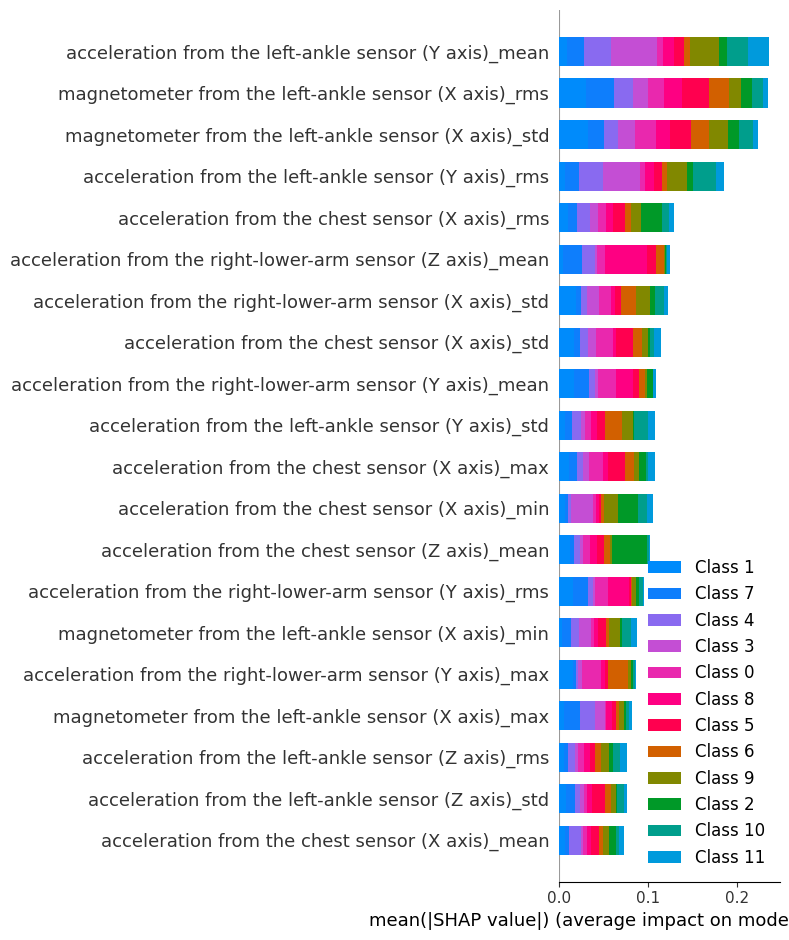


 XGBoost  SHAP summary (global feature impact)


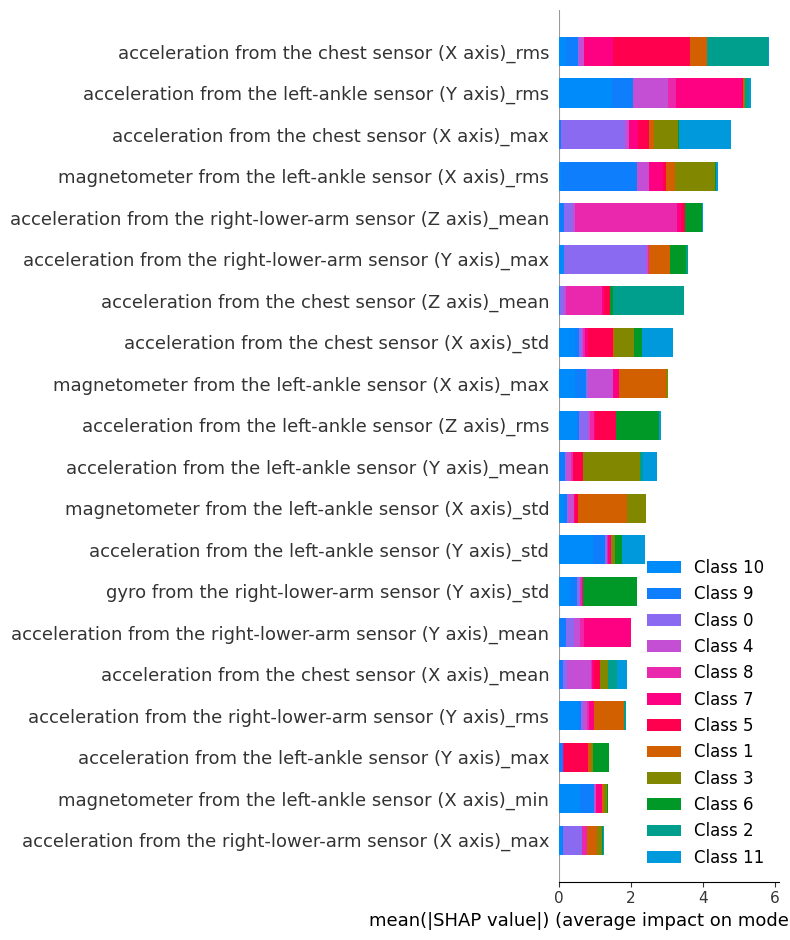


 Random Forest  Waterfall for sample 0, class 0


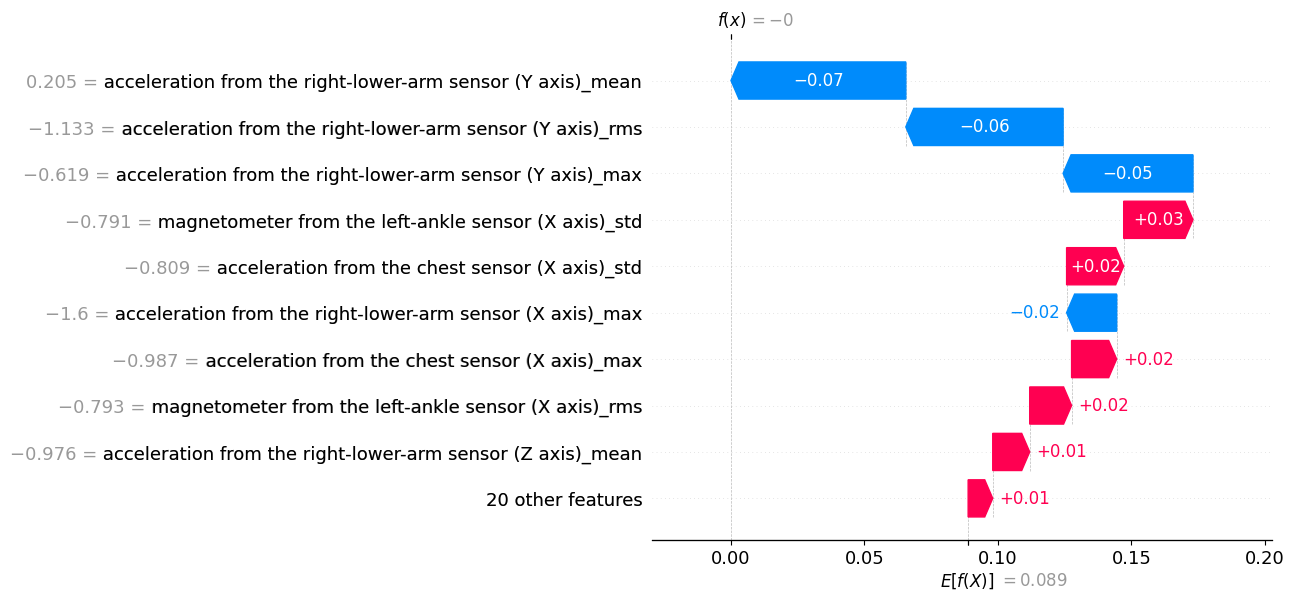


 XGBoost  Waterfall for sample 0, class 0


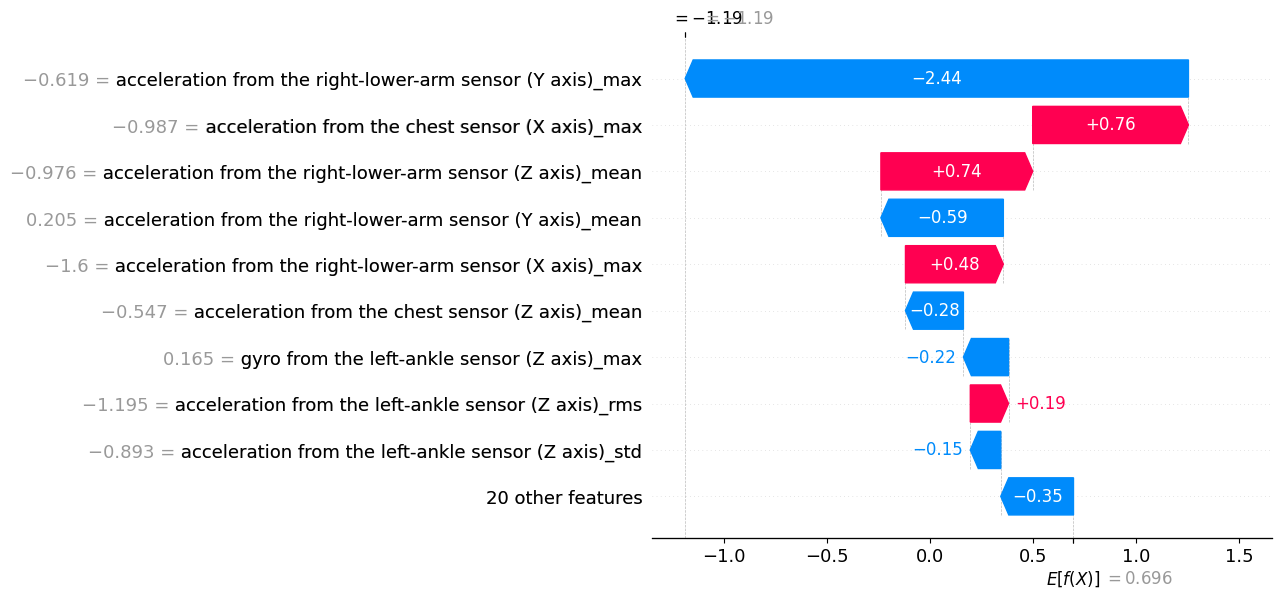

In [14]:
import shap
import matplotlib.pyplot as plt

# Build SHAP explainers for the final 29-feature models
explainer_rf  = shap.TreeExplainer(rf_selected)
explainer_xgb = shap.TreeExplainer(xgb_selected)

shap_vals_rf  = explainer_rf (X_test_sel)   # Explanation objects
shap_vals_xgb = explainer_xgb(X_test_sel)

# GLOBAL SUMMARY PLOTS

print("\n Random Forest SHAP summary (global feature impact)")
shap.summary_plot(
    shap_vals_rf,
    X_test_sel,
    feature_names=X_test_sel.columns,
    show=False
)
plt.tight_layout()
plt.show()

print("\n XGBoost  SHAP summary (global feature impact)")
shap.summary_plot(
    shap_vals_xgb,
    X_test_sel,
    feature_names=X_test_sel.columns,
    show=False
)
plt.tight_layout()
plt.show()

# LOCAL WATERFALL EXPLANATIONS  (single sample, single class)
sample_idx = 0   # choose any row from X_test_sel
class_idx  = 0   # choose a class index 0-11 (adjust as needed)

print(f"\n Random Forest  Waterfall for sample {sample_idx}, class {class_idx}")
plt.figure()
shap.plots.waterfall(shap_vals_rf[sample_idx, :, class_idx])
plt.title(f"RF | sample {sample_idx} | class {class_idx}")
plt.close() 
print(f"\n XGBoost  Waterfall for sample {sample_idx}, class {class_idx}")
plt.figure()
shap.plots.waterfall(shap_vals_xgb[sample_idx, :, class_idx])
plt.title(f"XGB | sample {sample_idx} | class {class_idx}")
plt.close() 